In [3]:
import pandas as pd
merged_df = pd.read_csv("C:/Users/gulat/Documents/Cult internship/Cleaned_datasets/Csv data/Cleaned.csv")

#Extracting relevant features 
features  = ["Price (INR)","Number Booked","MaxBookees"]
model_df = merged_df[features].copy()
print(model_df.head())


   Price (INR)  Number Booked  MaxBookees
0          499             12          25
1          499             15          25
2          499             14          25
3          499              9          25
4          499              7          25


In [4]:
from sklearn.model_selection import train_test_split  #used for splitting dataset into training and testing datasets
from sklearn.linear_model import LinearRegression   #used for creating and training a linear regression model

X = model_df[['Price (INR)', 'MaxBookees']]
y = model_df['Number Booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


Mean Squared Error (MSE): 71.01141069687132
R-squared: 0.14862476384746248


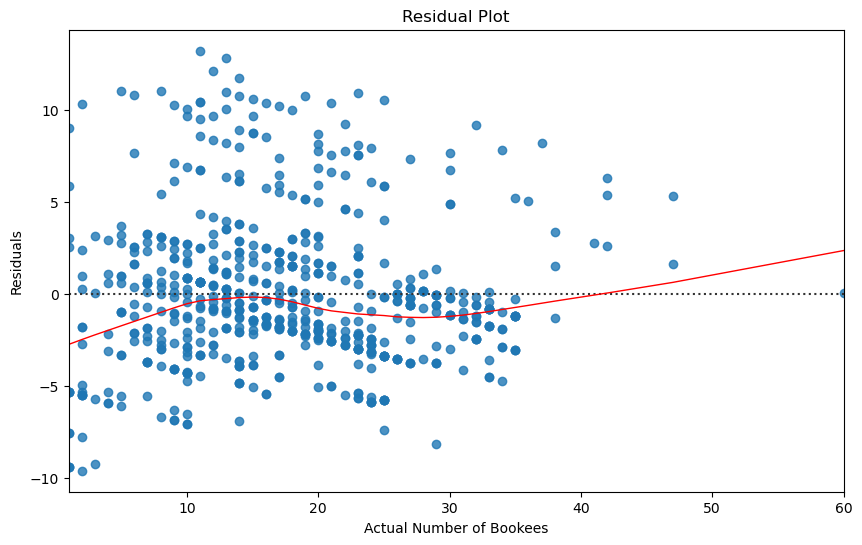

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Actual Number of Bookees')
plt.ylabel('Residuals')
plt.show()